In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("../data/clinical_trials_ML_ready.csv")
print("Loaded:", df.shape)

Loaded: (5783, 42)


In [19]:
df.head(10)

,rank,nct_number,title,status,study_results,conditions,interventions,outcome_measures,sponsor_collaborators,gender,...,completion_month,age_min,age_max,age_group,duration_days,condition_count,intervention_count,outcome_count,location_count,sponsor_type
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,4.0,18,120,Older Adult,172.0,1,1,1,1,Other
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,1.0,18,120,Older Adult,88.0,1,1,1,1,Other
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,6.0,18,120,Older Adult,404.0,1,1,1,1,University
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,8.0,0,12,Child,98.0,1,1,1,1,Other
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,0.0,18,48,Range,0.0,1,1,1,1,Other
5,6,NCT04516954,Convalescent Plasma for COVID-19 Patients,Enrolling by invitation,No Results Available,COVID 19,Biological: Convalescent COVID 19 Plasma,Evaluate the safety|Change in requirement for ...,Vinmec Research Institute of Stem Cell and Gen...,All,...,12.0,18,75,Range,151.0,1,1,1,1,Other
6,7,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,Not yet recruiting,No Results Available,Covid19|Exclusive Breastfeeding,Behavioral: COVID-19 Breastfeeding Support,COVID-19 breastfeeding guidance adherence at b...,Meharry Medical College,Female,...,0.0,18,45,Range,0.0,1,1,1,1,Other
7,8,NCT04634214,The Severity of COVID 19 in Diabetes and Non-d...,Not yet recruiting,No Results Available,Covid19|Type2 Diabetes,Other: No intervention,Severity of COVID 19 among people with and wit...,India Diabetes Research Foundation & Dr. A. Ra...,All,...,5.0,18,99,Range,181.0,1,1,1,1,Other
8,9,NCT04602884,Early Detection of COVID-19 Using Breath Analysis,Suspended,No Results Available,Covid19,Diagnostic Test: Breath biopsy sampling using ...,Correlation between Volatile Organic Compounds...,Scentech Medical Technologies Ltd,All,...,12.0,18,55,Range,464.0,1,1,1,1,Industry
9,10,NCT04384588,COVID19-Convalescent Plasma for Treating Patie...,Recruiting,No Results Available,COVID-19 Infection|Cancer Patients|General Pop...,Biological: Convalescent Plasma from COVID-19 ...,in-hospital mortality secondary to COVID-19 am...,Fundacion Arturo Lopez Perez|Confederación de ...,All,...,4.0,15,120,Older Adult,364.0,1,1,1,1,Other


In [20]:
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])

In [21]:
features = [
    "enrollment", "start_year", "start_month",
    "primary_year", "primary_month",
    "completion_year", "completion_month",
    "duration_days",
    "age_min", "age_max",
    "condition_count", "intervention_count",
    "outcome_count", "location_count",
    "start_missing", "primary_missing", "completion_missing"
]


In [22]:
features = [c for c in features if c in df.columns]

In [23]:
X = df[features]
y = df["status_encoded"]

In [24]:
X = X.fillna(0)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"   # multi-class imbalance handle karta hai
)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred = model.predict(X_test)

In [28]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 65.51%


In [29]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.34      0.14      0.20        92
           2       0.00      0.00      0.00         2
           3       0.64      0.74      0.68       213
           4       0.09      0.03      0.04        34
           5       0.00      0.00      0.00         3
           6       0.65      0.55      0.59       203
           7       0.69      0.81      0.74       561
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        16
          11       1.00      1.00      1.00        23

    accuracy                           0.66      1157
   macro avg       0.31      0.30      0.30      1157
weighted avg       0.62      0.66      0.63      1157



c:\Users\hp\Desktop\Power BI\internship\all_projects\Covid_19_clinical_EDA_ML\env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\Desktop\Power BI\internship\all_projects\Covid_19_clinical_EDA_ML\env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\Desktop\Power BI\internship\all_projects\Covid_19_clinical_EDA_ML\env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

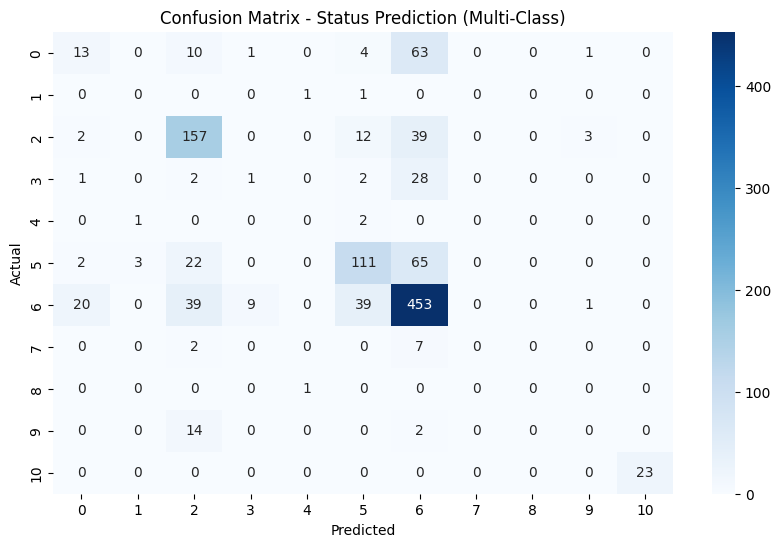

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Status Prediction (Multi-Class)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('../images/confusion_matrix_status_prediction', dpi=300, bbox_inches='tight')
plt.show()

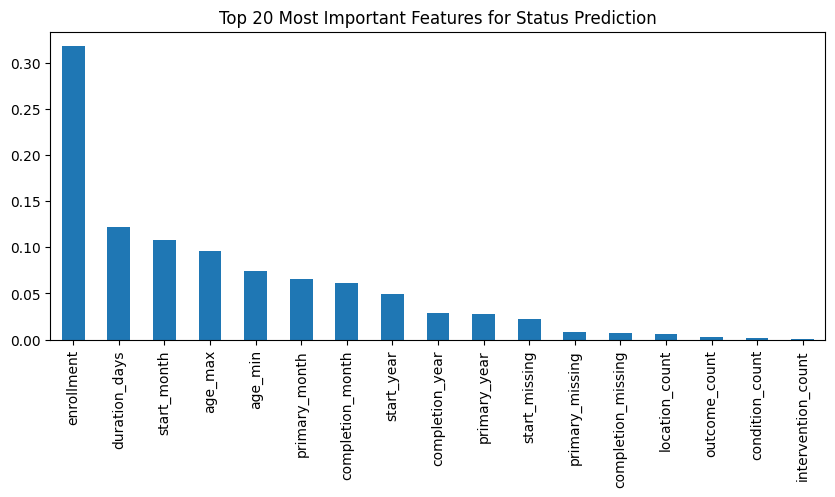

In [31]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Most Important Features for Status Prediction")
plt.savefig('../images/feature_importances_status_prediction', dpi=300, bbox_inches='tight')
plt.show()

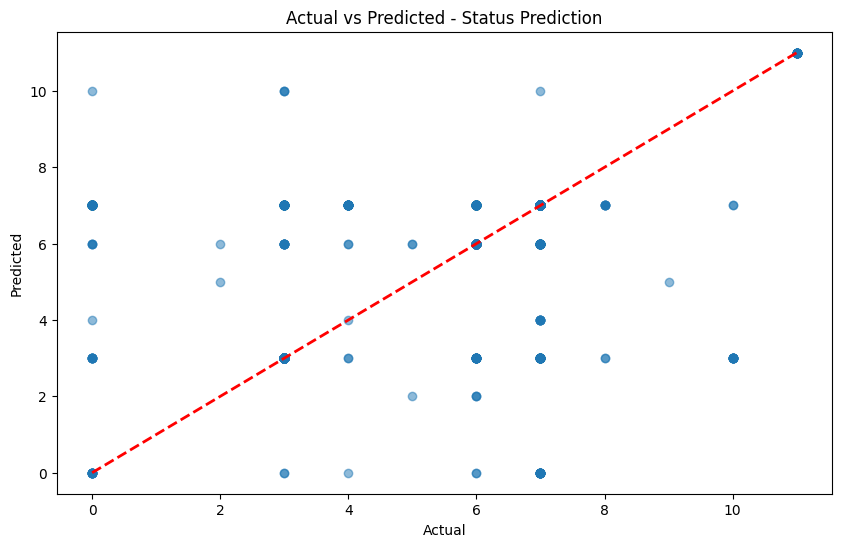

In [32]:
# actual vs prdeicted plot for status prediction with red line y=x
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title("Actual vs Predicted - Status Prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig('../images/actual_vs_predicted_status_prediction', dpi=300, bbox_inches='tight')
plt.show()